# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-04-calculo_variacional.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de Cálculo Variacional

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Cálculo variacional

Definición numérico de la funcional correspondiente a la longitud de arco:

In [2]:
def funcional_integral(f0,eta,epsilon,a,b,**opciones_de_f0):
    
    #Definimos las función con su variación
    f=lambda t:f0(t,**opciones_de_f0)+epsilon*eta(t)
    
    #La derivada de f la calculamos con derivative
    from scipy.misc import derivative
    dfdt=lambda t:derivative(f,t,0.01)
    
    #Este es el integrando del funcional
    from numpy import sqrt
    L=lambda t:sqrt(1+abs(dfdt(t))**2)
    
    #El funcional es la integral definida del integrando
    from scipy.integrate import quad
    integral=quad(L,a,b)
    longitud=integral[0]
    
    return longitud

Definición de la función plantilla:

In [3]:
#Intevalo entre los puntos
from numpy import pi
a=0
b=pi

#Funcion de referencia
def curva(t,n=1):
    return (t/pi)**n

#Función plantilla
from numpy import sin
eta=sin

Cálculo del funcional:

In [4]:
n=2
If=funcional_integral(curva,eta,0.5,a,b,n=n)
print(f"I[f] = {If}")

I[f] = 3.3371628094173413


/tmp/ipykernel_57797/373015436.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfdt=lambda t:derivative(f,t,0.01)


Definiciòn de la función lambda para el cálculo del funcional:

In [5]:
longitud_arco=lambda epsilon:funcional_integral(curva,eta,epsilon,a,b,n=n)

Minimización del funcional:

In [6]:
from scipy.optimize import minimize
solucion=minimize(longitud_arco,0.0)

print(f"Resultado de la minimización:\n{solucion}")

Resultado de la minimización:
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.297572201351241
        x: [ 2.580e-01]
      nit: 3
      jac: [ 1.132e-06]
 hess_inv: [[ 7.369e-01]]
     nfev: 8
     njev: 4


/tmp/ipykernel_57797/373015436.py:8: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dfdt=lambda t:derivative(f,t,0.01)


Gráfico de la solución y de lo esperado analíticamente:

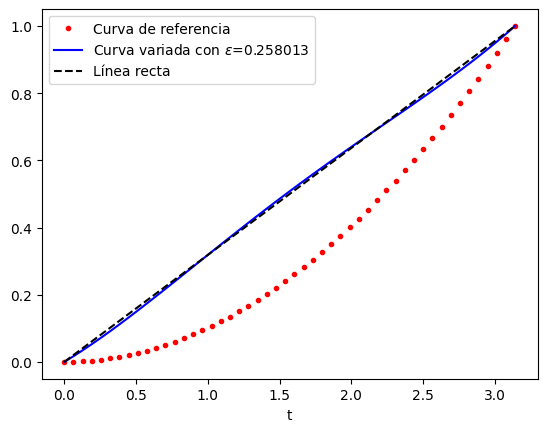

In [7]:
import matplotlib.pyplot as plt
plt.figure()

from numpy import linspace,pi
ts=linspace(0,pi)

#Valor de epsilon proveniende de la minimización
epsilon=solucion.x[0]

plt.plot(ts,curva(ts,n=n),'r.',
         label=f"Curva de referencia")
plt.plot(ts,curva(ts,n=n)+epsilon*eta(ts),'b-',
         label=f"Curva variada con $\epsilon$={epsilon:g}")
plt.plot(ts,curva(ts,n=1),'k--',
         label=f"Línea recta")

plt.legend();

#--hide--
plt.xlabel("t");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)